# Marketing Department
Se buscará entender los patrones de comportamiento del cliente, hábitos de compra y segmentar en diferentes cluster para poder enfocar una estrategia posterior de venta a cada segmento.

## Paso 1: Import Librerias

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pd.options.display.max_columns = 30
pd.options.display.float_format='{:,.2f}'.format

## Paso 2: Importar Dataset

In [21]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df.head()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.90               0.82      95.40              0.00   
1  C10002 3,202.47               0.91       0.00              0.00   
2  C10003 2,495.15               1.00     773.17            773.17   
3  C10004 1,666.67               0.64   1,499.00          1,499.00   
4  C10005   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00      6,442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2      1,000.00   
1                    0.25                 4              0      7,000.00   
2                    0.00                 0             12      7,500.00   
3                    0.08                 1              1      7,500.00   
4                    0.00                 0              1      1,200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    201.80            139.51              0.00      12  
1  4,103.03          1,072.34              0.22      12  
2    622.07            627.28              0.00      12  
3      0.00               nan              0.00      12  
4    678.33            244.79              0.00      12

In [22]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count  8,950.00           8,950.00   8,950.00          8,950.00   
mean   1,564.47               0.88   1,003.20            592.44   
std    2,081.53               0.24   2,136.63          1,659.89   
min        0.00               0.00       0.00              0.00   
25%      128.28               0.89      39.63              0.00   
50%      873.39               1.00     361.28             38.00   
75%    2,054.14               1.00   1,110.13            577.41   
max   19,043.14               1.00  49,039.57         40,761.25   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                8,950.00      8,950.00             8,950.00   
mean                   411.07        978.87                 0.49   
std                    904.34      2,097.16                 0.40   
min                      0.00          0.00                 0.00   
25%                      0.00          0.00                 0.08   
50%                     89.00          0.00                 0.50   
75%                    468.64      1,113.82                 0.92   
max                 22,500.00     47,137.21                 1.00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                    8,950.00                          8,950.00   
mean                         0.20                              0.36   
std                          0.30                              0.40   
min                          0.00                              0.00   
25%                          0.00                              0.00   
50%                          0.08                              0.17   
75%                          0.30                              0.75   
max                          1.00                              1.00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                8,950.00          8,950.00       8,950.00      8,949.00   
mean                     0.14              3.25          14.71      4,494.45   
std                      0.20              6.82          24.86      3,638.82   
min                      0.00              0.00           0.00         50.00   
25%                      0.00              0.00           1.00      1,600.00   
50%                      0.00              0.00           7.00      3,000.00   
75%                      0.22              4.00          17.00      6,500.00   
max                      1.50            123.00         358.00     30,000.00   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
count  8,950.00          8,637.00          8,950.00 8,950.00  
mean   1,733.14            864.21              0.15    11.52  
std    2,895.06          2,372.45              0.29     1.34  
min        0.00              0.02              0.00     6.00  
25%      383.28            169.12              0.00    12.00  
50%      856.90            312.34              0.00    12.00  
75%    1,901.13            825.49              0.14    12.00  
max   50,721.48         76,406.21              1.00    12.00

In [23]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [24]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']== 40761.250000]

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574 11,547.52               1.00  49,039.57         40,761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                8,278.32        558.17                 1.00   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                        1.00                              0.92   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                    0.08                 1            101     22,500.00   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550 46,930.60          2,974.07              0.25      12

## Paso 3: Visualización y limpieza de datos

In [26]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [27]:
# Completamos los valores restantes de Minimun Payments por la media
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [28]:
# Completando el valor faltante con la media de 'Credit_limit'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [29]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [30]:
# Veremos si tenemos datos duplicados
creditcard_df.duplicated().sum()

0

In [31]:
# Quitaremos Customer ID, porque no se usará en la predicción
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [32]:
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1 3,202.47               0.91       0.00              0.00   
2 2,495.15               1.00     773.17            773.17   
3 1,666.67               0.64   1,499.00          1,499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00      6,442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2      1,000.00   
1                    0.25                 4              0      7,000.00   
2                    0.00                 0             12      7,500.00   
3                    0.08                 1              1      7,500.00   
4                    0.00                 0              1      1,200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    201.80            139.51              0.00      12  
1  4,103.03          1,072.34              0.22      12  
2    622.07            627.28              0.00      12  
3      0.00            864.21              0.00      12  
4    678.33            244.79              0.00      12

In [35]:
n = len(creditcard_df.columns)
n

17

In [36]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

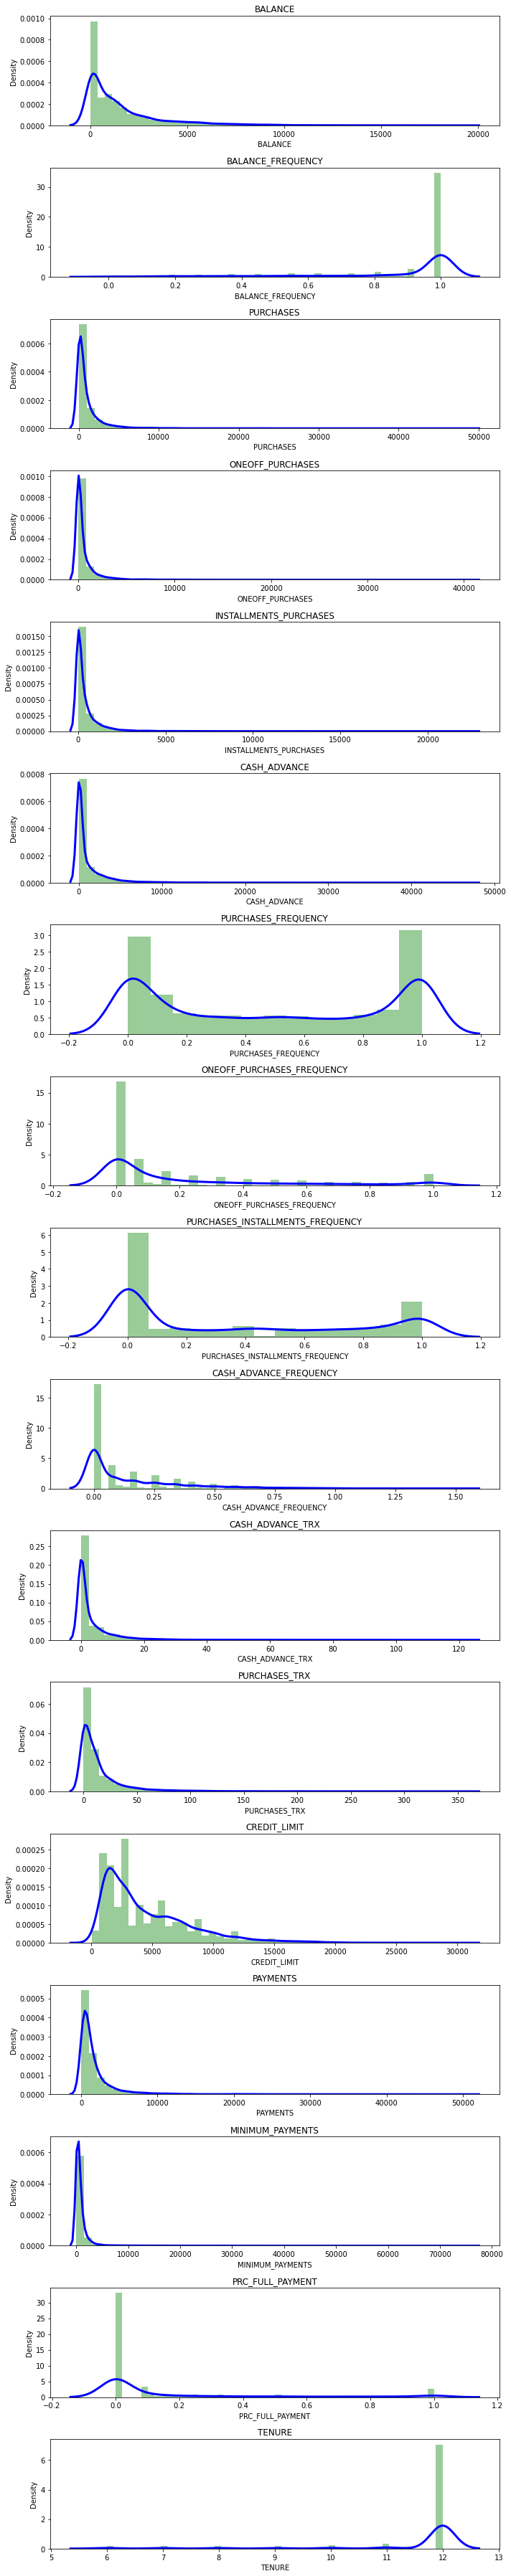

In [44]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw':3, 'label':'KDE'}, hist_kws={'color': 'g'})
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

Observaciones:
- Promedio de balance es 1500.
- 'PURCHASES_FREQUENCY' cuenta con 2 grupos distintos de compradores.
- Para 'ONEOFF_PURCHASES_FREQUENCY'  y PURCHASES_INSTALLMENT_FREQUENCY, la mayoría de los usuarios no realizan compras únicas ni a plazos con frecuencia.
- Un número muy pequeño de clientes paga su saldo en su totalidad 'PRC_FULL_PAYMENT' ~ 0
- El promedio del límite de crédito es de alrededor de $ 4500
- La mayoría de los clientes tienen ~ 11 años de antigüedad

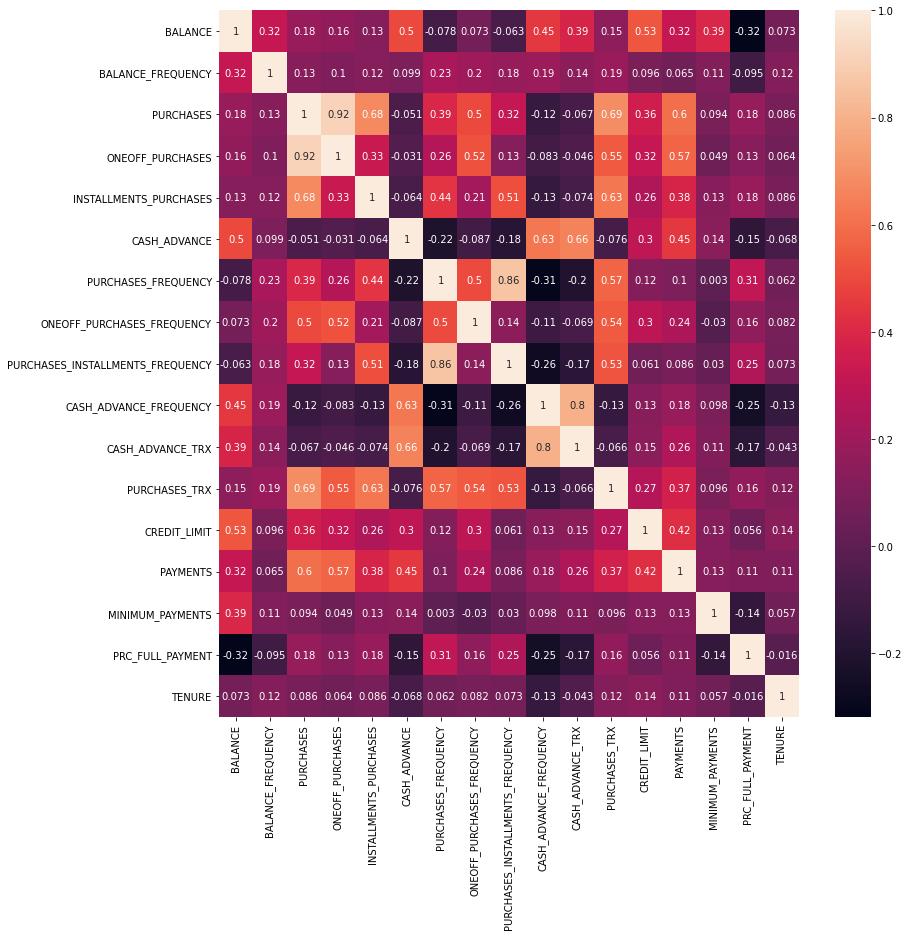

In [50]:
f, ax = plt.subplots(figsize = (13,13))
correlations = creditcard_df.corr()
sns.heatmap(correlations, annot = True);

## Paso 4: Clasterización

In [51]:
# Escalaremos primero los datos
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [53]:
creditcard_df_scaled.shape

(8950, 17)

In [54]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [59]:
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)

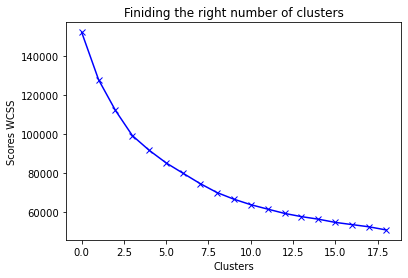

In [64]:
plt.plot(scores_1, 'bx-')
plt.title('Finiding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

## Paso 5: Aplicando K-Means Method

In [66]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [68]:
labels

array([7, 4, 6, ..., 3, 3, 3])

In [70]:
kmeans.cluster_centers_.shape

(8, 17)

In [71]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[creditcard_df.columns])

In [72]:
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES INSTALLMENTS_PURCHASES  \
0   -0.70             -2.14     -0.31            -0.23                  -0.30   
1    1.04              0.47      2.50             1.81                   2.59   
2   -0.36              0.33     -0.04            -0.24                   0.36   
3   -0.34             -0.35     -0.29            -0.21                  -0.29   
4    1.69              0.39     -0.22            -0.15                  -0.23   
5    1.85              0.34     12.30            12.82                   5.52   
6   -0.13              0.40      0.54             0.67                   0.05   
7    0.01              0.40     -0.36            -0.24                  -0.40   

  CASH_ADVANCE PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY  \
0        -0.32               -0.55                      -0.44   
1        -0.16                1.16                       1.56   
2        -0.36                0.99                      -0.38   
3         0.07               -0.20                      -0.29   
4         2.01               -0.47                      -0.21   
5         0.27                1.04                       2.15   
6        -0.33                0.98                       1.90   
7        -0.09               -0.86                      -0.40   

  PURCHASES_INSTALLMENTS_FREQUENCY CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX  \
0                            -0.44                  -0.52            -0.38   
1                             1.27                  -0.28            -0.15   
2                             1.20                  -0.47            -0.36   
3                            -0.23                   0.31            -0.00   
4                            -0.41                   1.91             1.92   
5                             0.90                  -0.38            -0.11   
6                             0.17                  -0.41            -0.33   
7                            -0.76                   0.11            -0.03   

  PURCHASES_TRX CREDIT_LIMIT PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT TENURE  
0         -0.42        -0.18    -0.20            -0.26             0.29   0.20  
1          3.13         1.30     1.44             0.56             0.25   0.34  
2          0.19        -0.26    -0.22            -0.03             0.31   0.26  
3         -0.39        -0.56    -0.39            -0.21             0.01  -3.20  
4         -0.26         1.03     0.82             0.55            -0.39   0.07  
5          4.56         3.19     9.05             1.03             1.22   0.30  
6          0.62         0.43     0.14            -0.16             0.44   0.27  
7         -0.48        -0.30    -0.25            -0.01            -0.46   0.27

In [73]:
labels.shape

(8950,)

In [74]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1 3,202.47               0.91       0.00              0.00   
2 2,495.15               1.00     773.17            773.17   
3 1,666.67               0.64   1,499.00          1,499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00      6,442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2      1,000.00   
1                    0.25                 4              0      7,000.00   
2                    0.00                 0             12      7,500.00   
3                    0.08                 1              1      7,500.00   
4                    0.00                 0              1      1,200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0    201.80            139.51              0.00      12        7  
1  4,103.03          1,072.34              0.22      12        4  
2    622.07            627.28              0.00      12        6  
3      0.00            864.21              0.00      12        7  
4    678.33            244.79              0.00      12        7

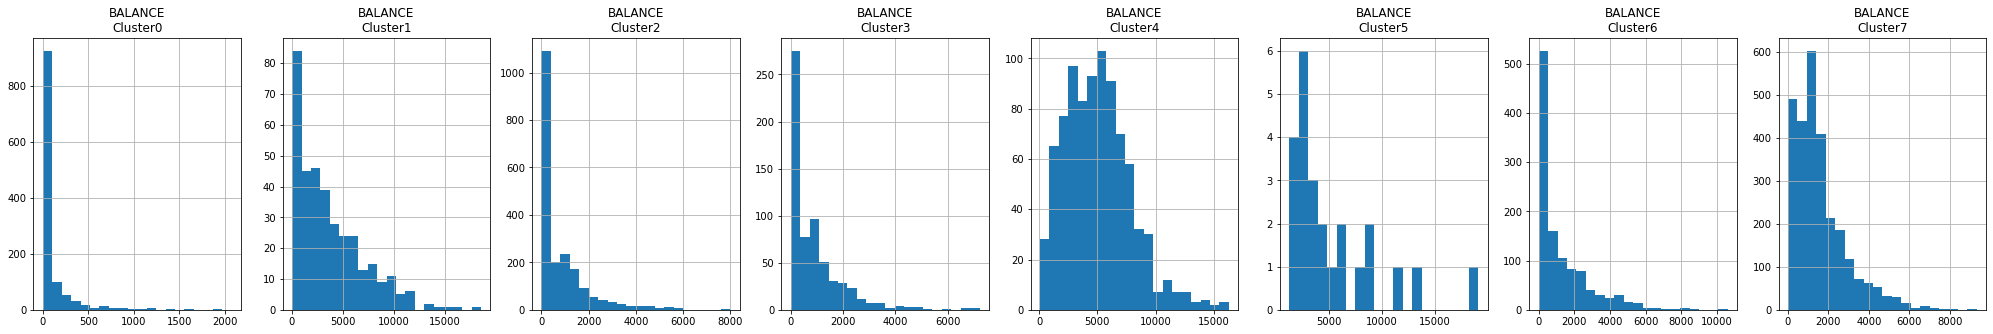

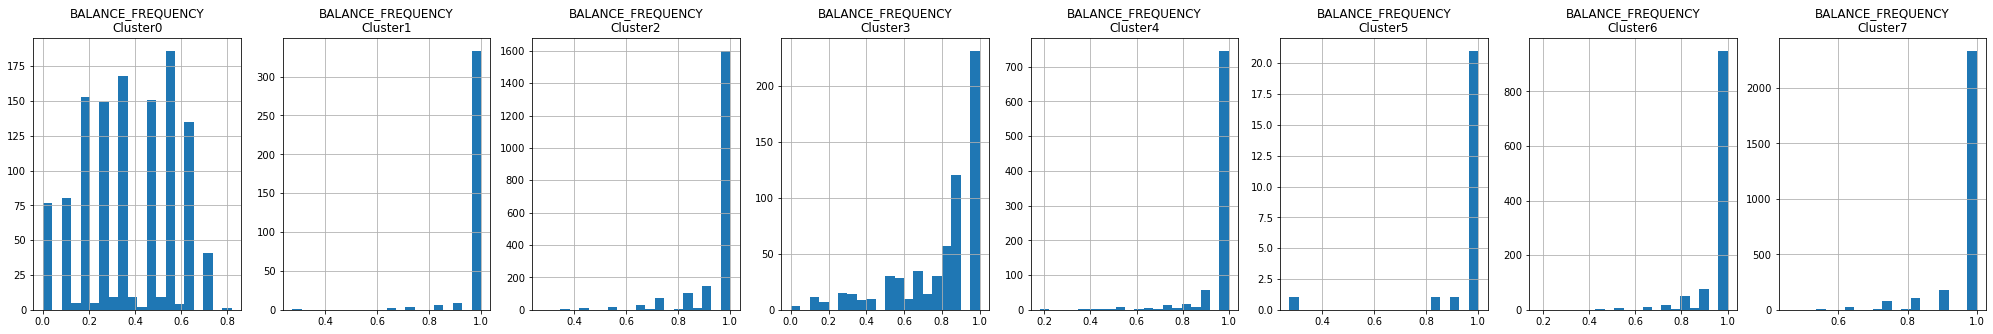

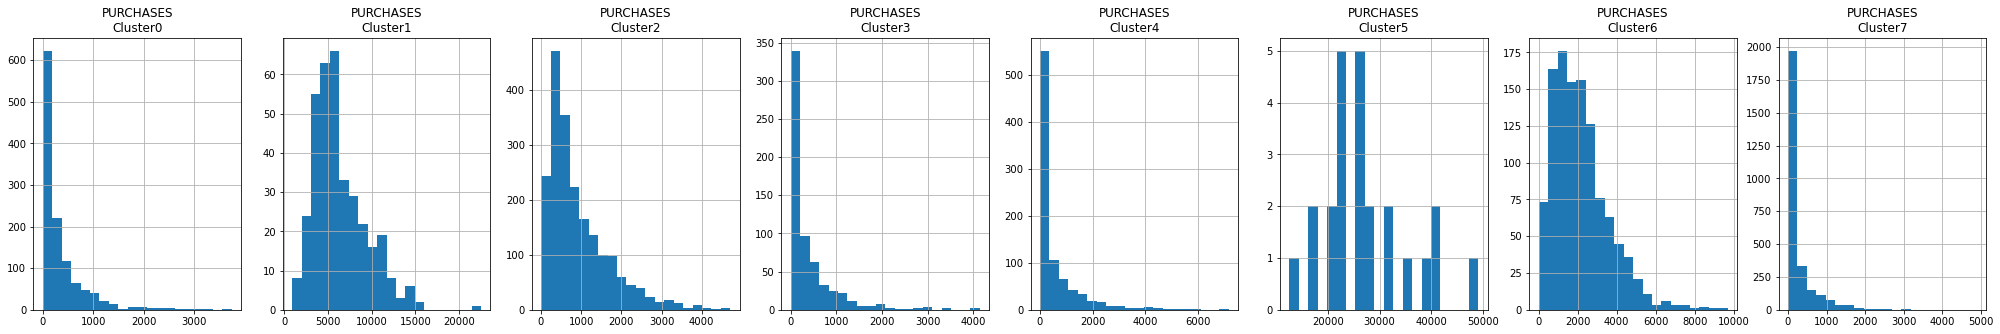

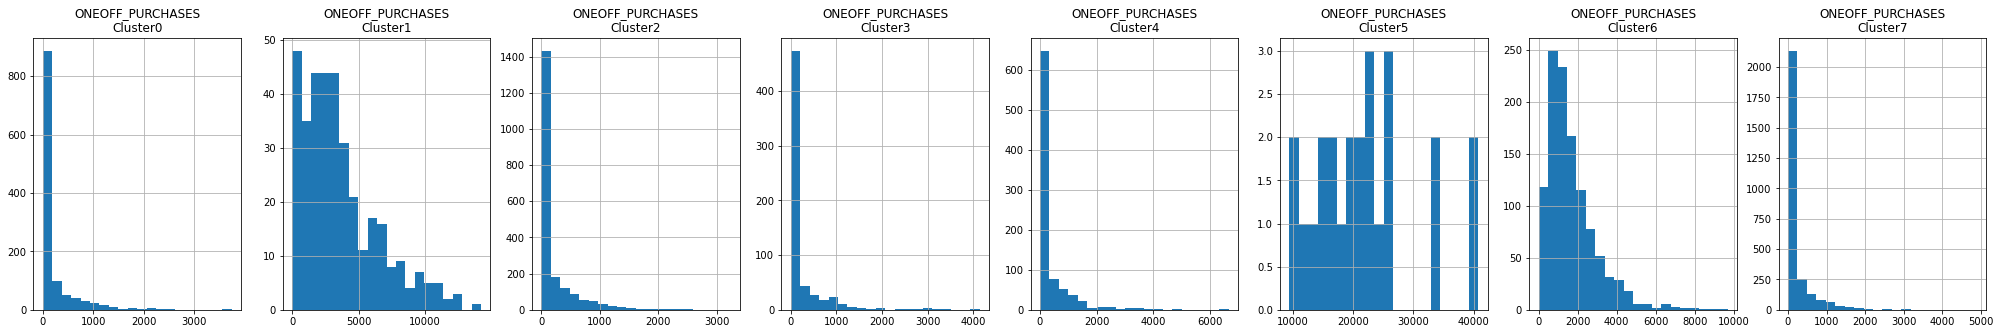

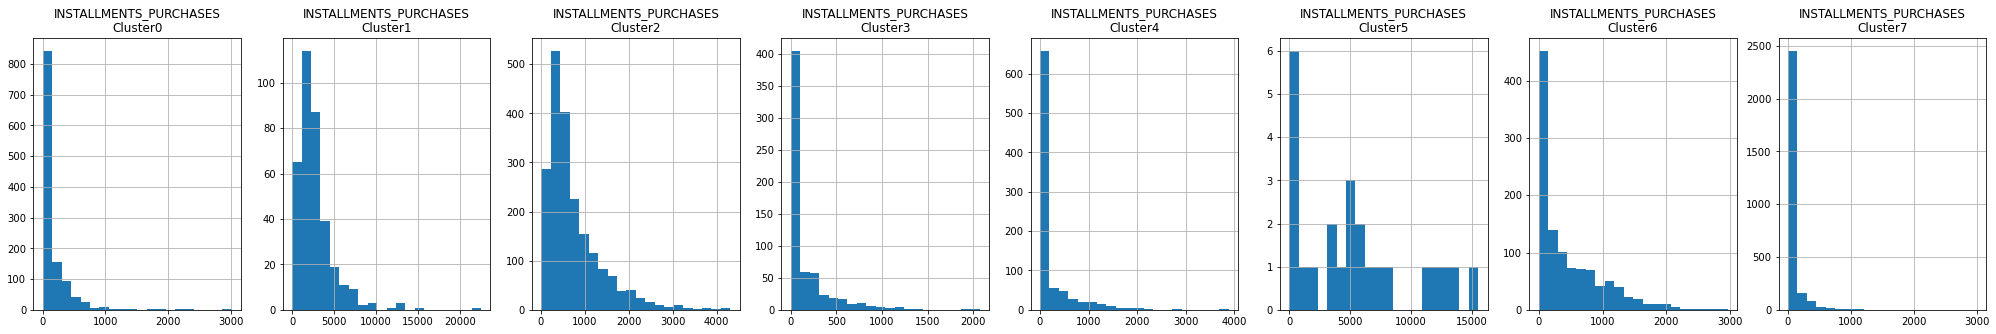

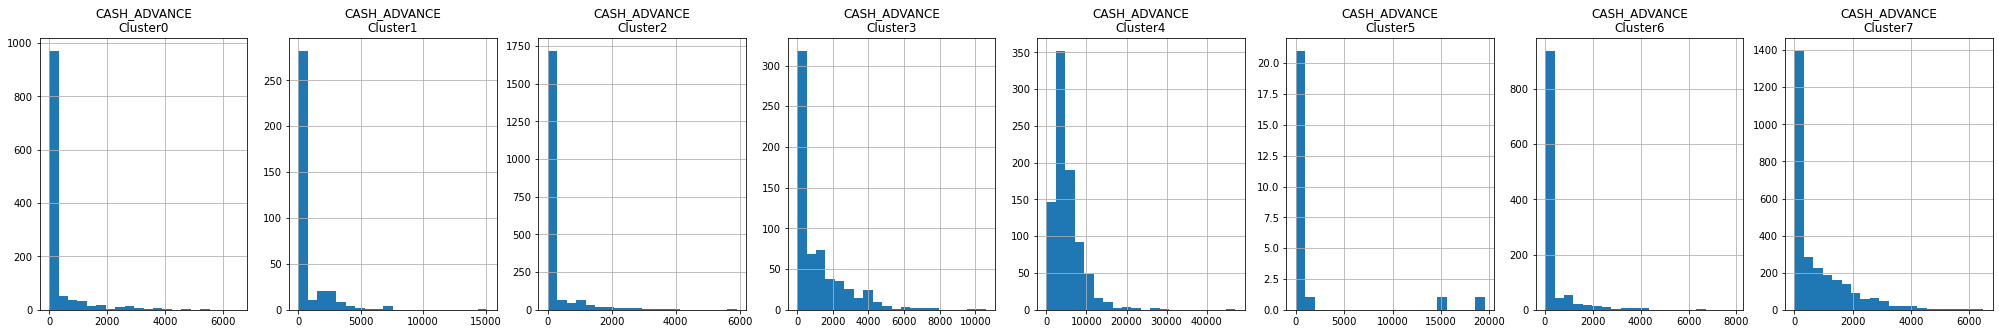

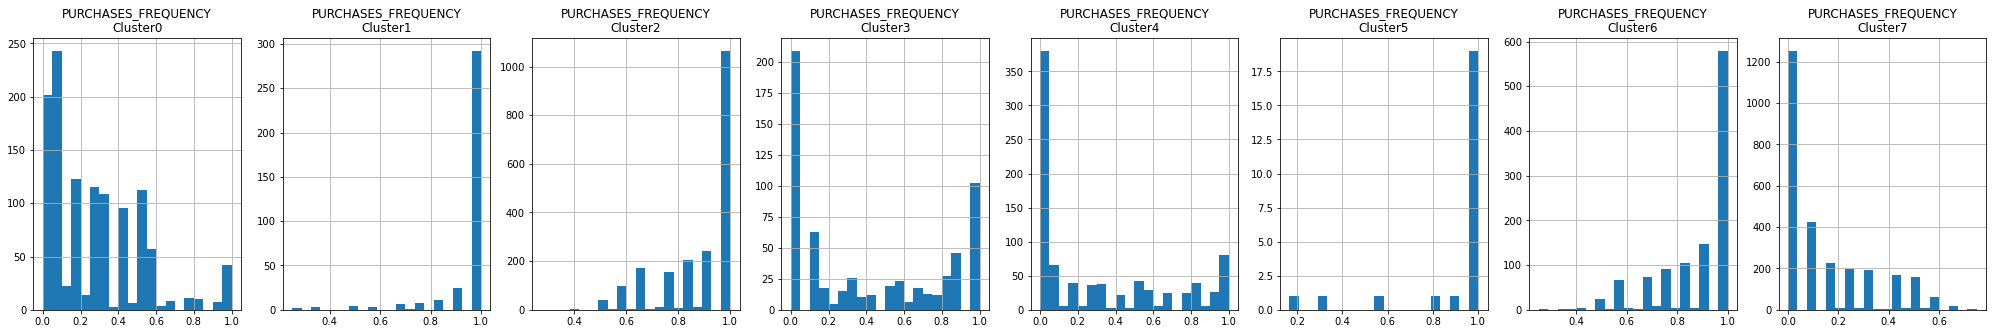

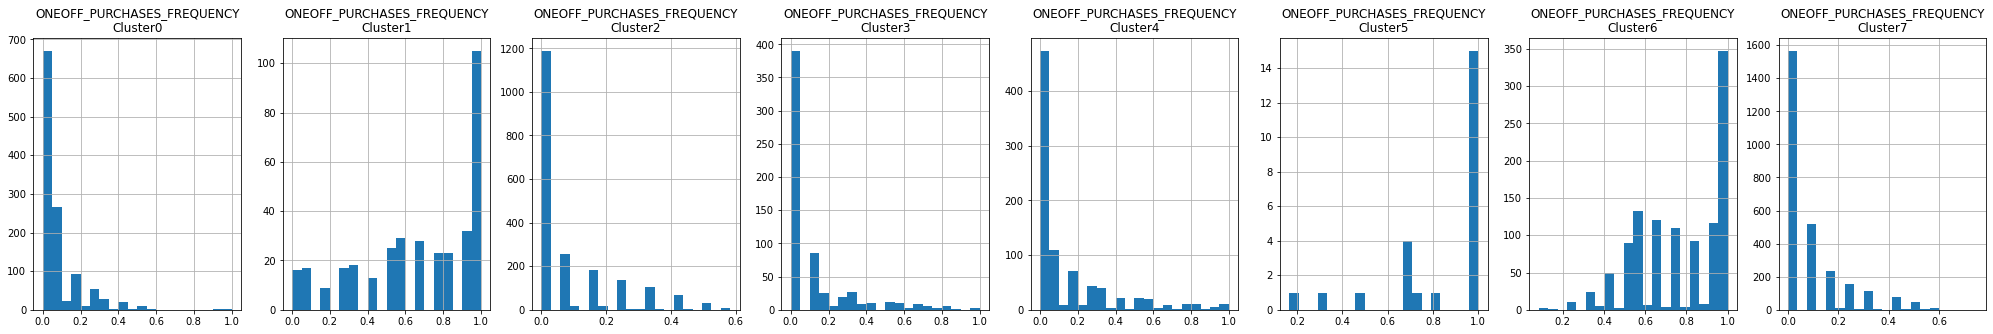

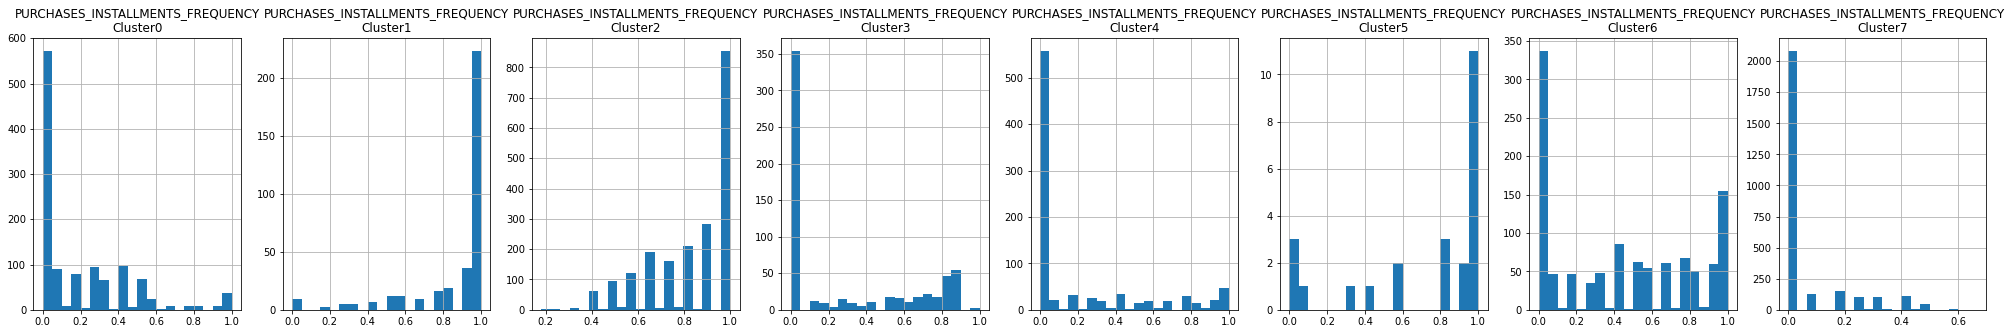

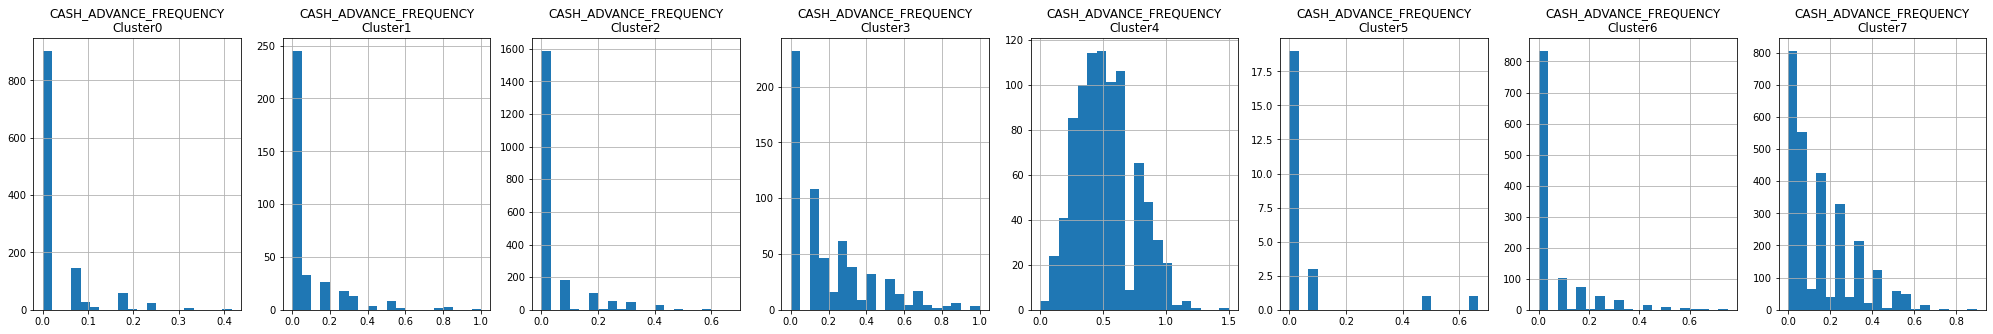

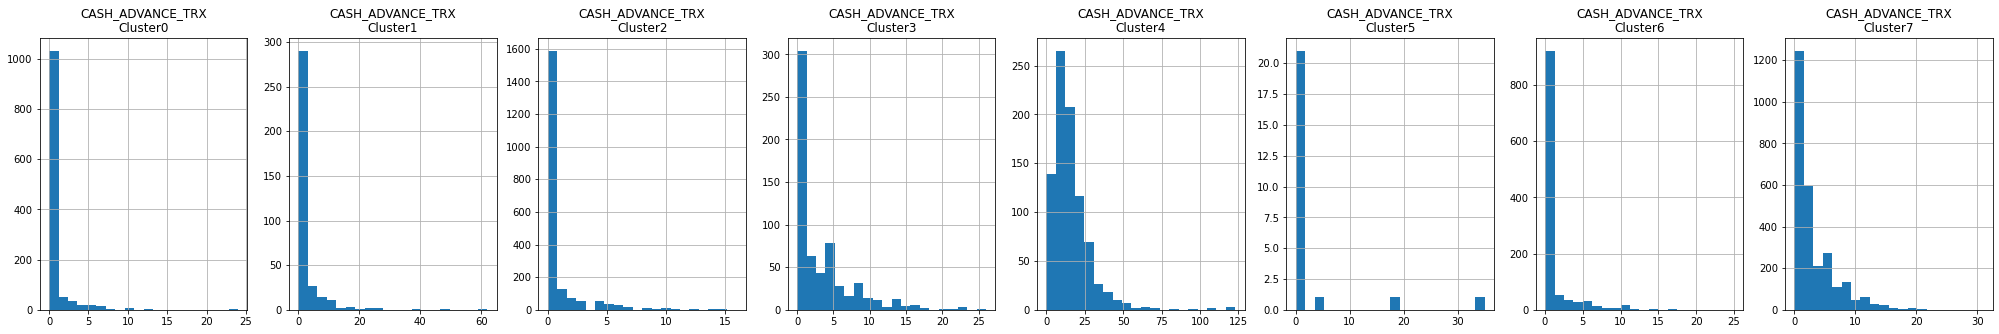

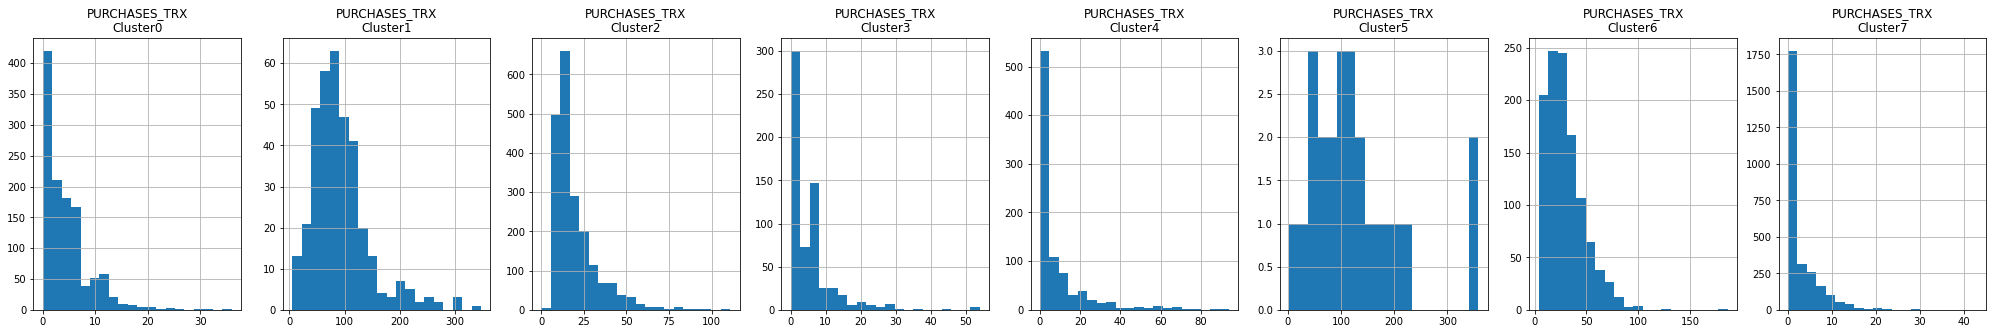

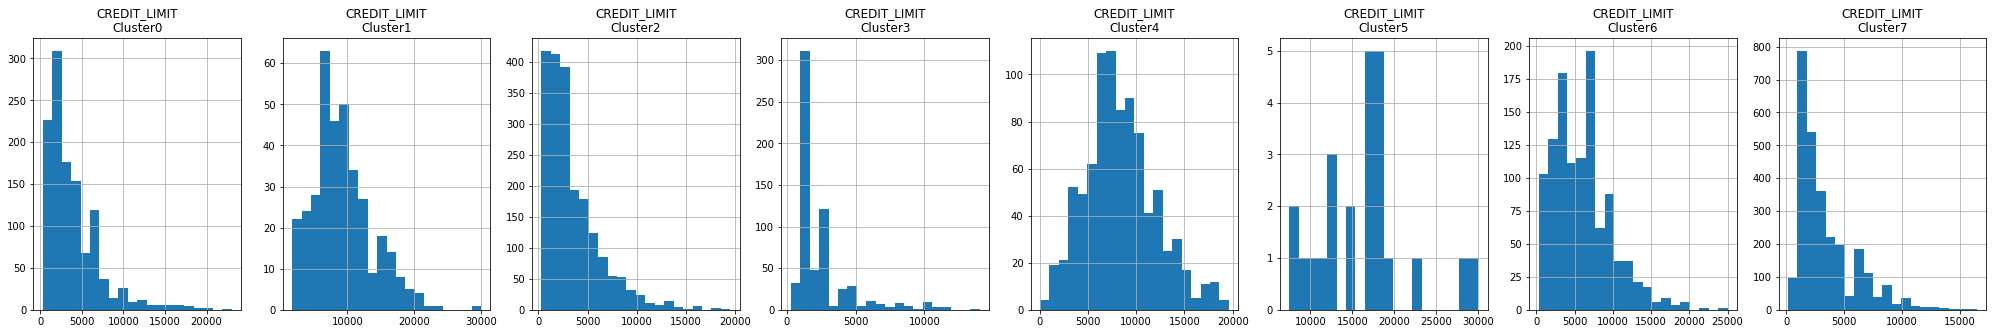

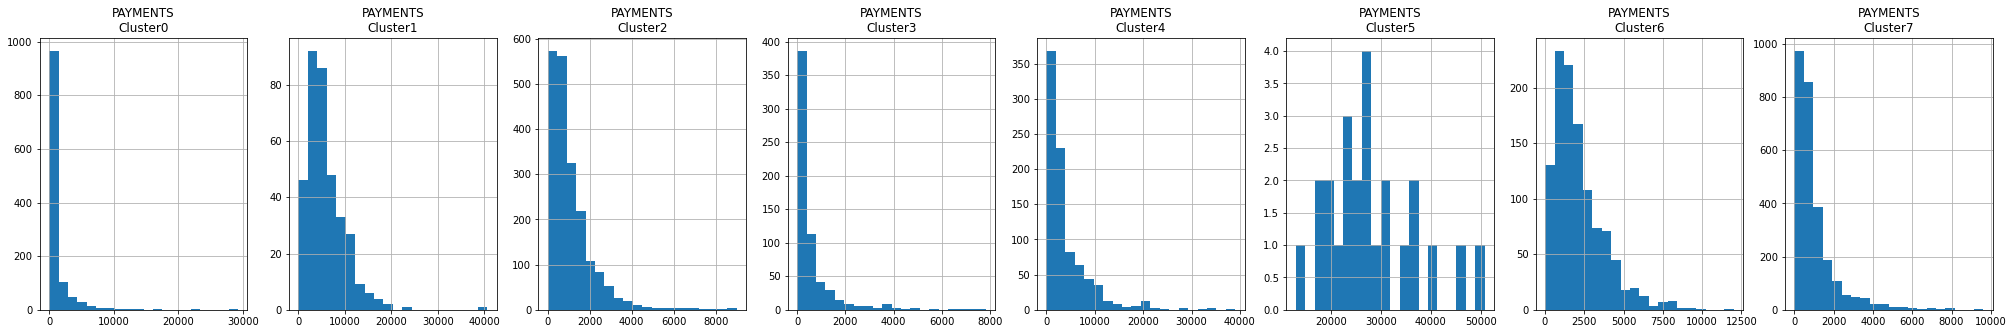

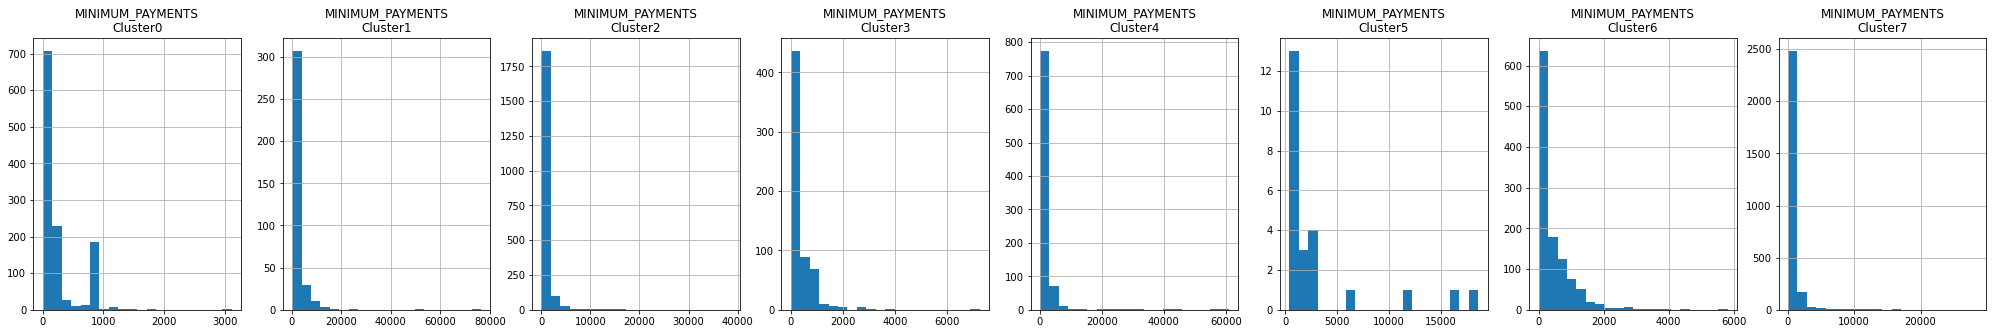

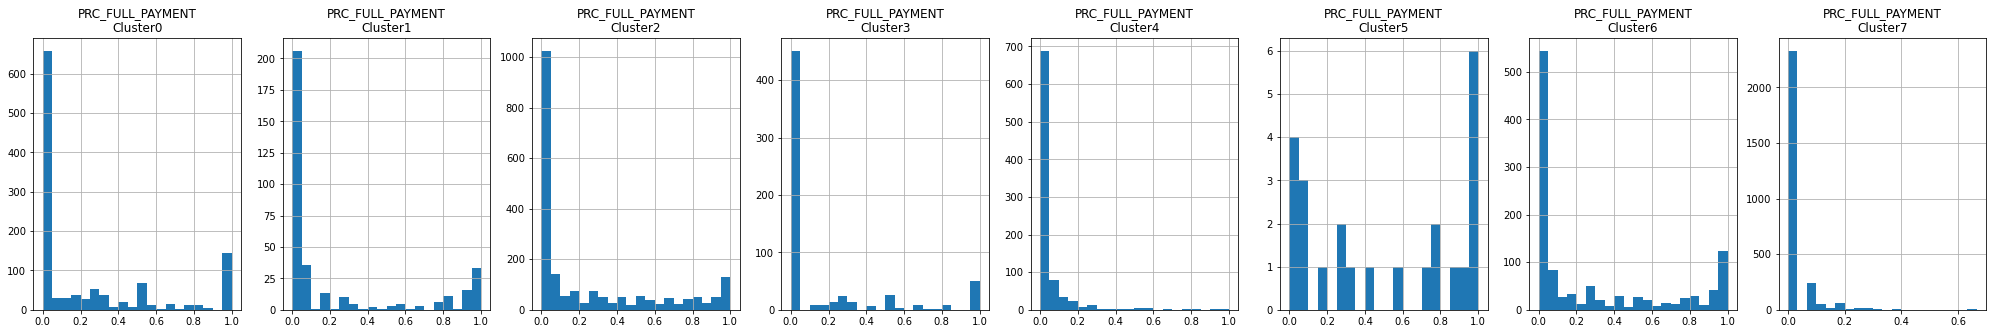

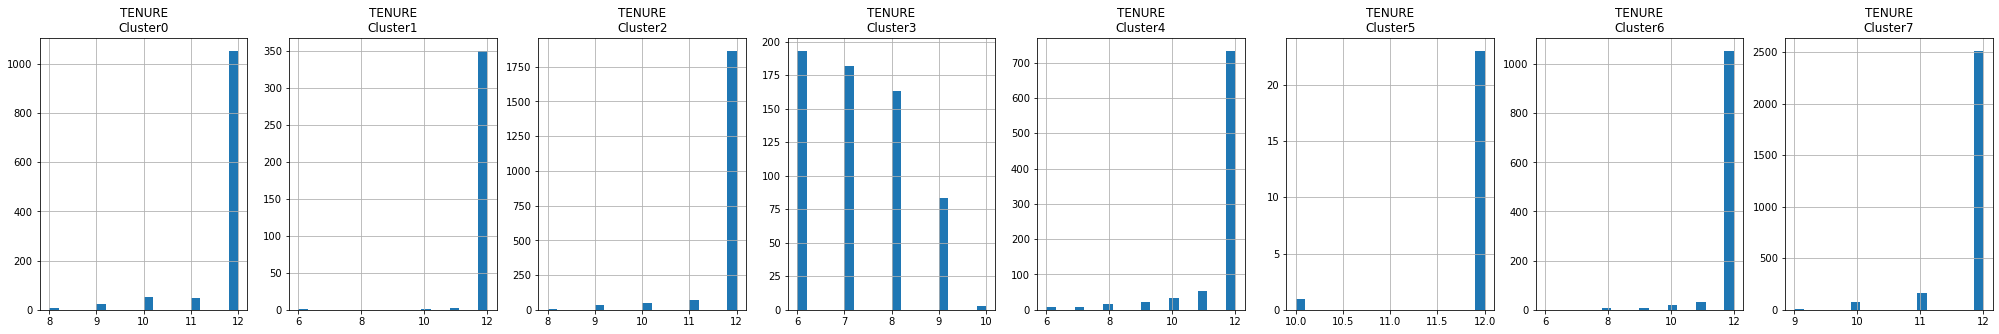

In [78]:
# Plor the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster ['cluster']==j ]
        cluster[i].hist(bins=20)
        plt.title('{}\nCluster{}'.format(i,j))
plt.show()

- Clúster de primeros clientes (Transactores): aquellos son los clientes que pagan la menor cantidad de cargos de interés y cuidadosos con su dinero, Clúster con saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago total = 23%.
- Segundo grupo de clientes (revólveres) que usan la tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipos en efectivo (0.5), transacciones altas de anticipos en efectivo ( 16) y bajo porcentaje del pago total (3%).
- Tercer grupo de clientes (VIP / Prime): límite de crédito alto de $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto.
- Cuarto grupo de clientes (baja tenencia): estos son clientes con baja tenencia (7 años), saldo bajo.

## Paso 6: Aplicar PCA para reducción de variables

In [79]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222136, -1.07644957],
       [-1.13830839,  2.50645701],
       [ 0.96967915, -0.38354114],
       ...,
       [-0.92619974, -1.81077667],
       [-2.33654432, -0.65794729],
       [-0.55641845, -0.40046537]])

In [89]:
# Crearemos un dataframe con los 2 componentes
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])
pca_df.head()

pca1  pca2
0 -1.68 -1.08
1 -1.14  2.51
2  0.97 -0.38
3 -0.87  0.04
4 -1.60 -0.69

In [90]:
# Concaternarios los cluster al data Frame
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

pca1  pca2  cluster
0 -1.68 -1.08        7
1 -1.14  2.51        4
2  0.97 -0.38        6
3 -0.87  0.04        7
4 -1.60 -0.69        7

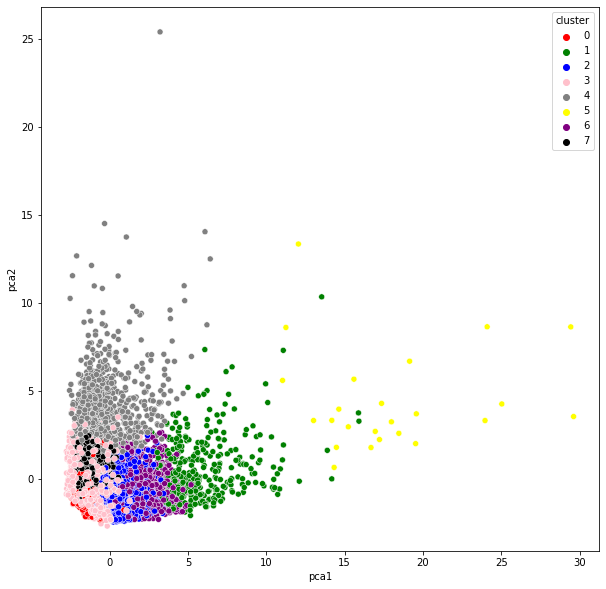

In [92]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red','green','blue','pink','gray','yellow','purple','black'] )

## Paso 7: Autoencoders
Es una red neuronal artificial que se usa para codificar datos(aprendizahe de representación) 

In [95]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model   
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [97]:
input_df = Input(shape=(17,))

x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# Autoencoder
autoencoder = Model (input_df, decoded )

# Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [98]:
creditcard_df_scaled.shape  

(8950, 17)

In [99]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 3s 32ms/step - loss: 0.7215
Epoch 2/25
70/70 [==============================] - 2s 30ms/step - loss: 0.3267
Epoch 3/25
70/70 [==============================] - 2s 35ms/step - loss: 0.2415
Epoch 4/25
70/70 [==============================] - 2s 31ms/step - loss: 0.1995
Epoch 5/25
70/70 [==============================] - 2s 33ms/step - loss: 0.1727
Epoch 6/25
70/70 [==============================] - 3s 36ms/step - loss: 0.1534
Epoch 7/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1508
Epoch 8/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1294
Epoch 9/25
70/70 [==============================] - 2s 33ms/step - loss: 0.1262
Epoch 10/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1108
Epoch 11/25
70/70 [==============================] - 2s 29ms/step - loss: 0.1097
Epoch 12/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1071
Epoch 13/25
70/70 [==================

In [100]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_2 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              22000 

In [102]:
pred = encoder.predict(creditcard_df_scaled)

In [104]:
pred.shape

(8950, 10)

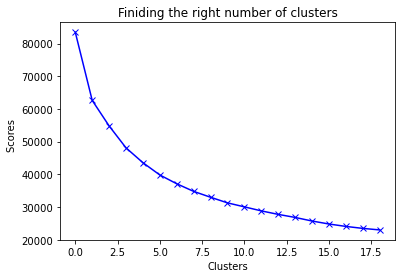

In [105]:
scores_2 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finiding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores  ')
plt.show()

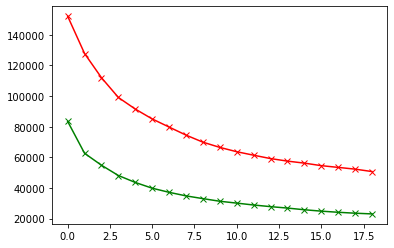

In [106]:
plt.plot(scores_1,'bx-', color='r')
plt.plot(scores_2,'bx-', color='g')

In [108]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [109]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1 3,202.47               0.91       0.00              0.00   
2 2,495.15               1.00     773.17            773.17   
3 1,666.67               0.64   1,499.00          1,499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00      6,442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2      1,000.00   
1                    0.25                 4              0      7,000.00   
2                    0.00                 0             12      7,500.00   
3                    0.08                 1              1      7,500.00   
4                    0.00                 0              1      1,200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0    201.80            139.51              0.00      12        3  
1  4,103.03          1,072.34              0.22      12        1  
2    622.07            627.28              0.00      12        0  
3      0.00            864.21              0.00      12        3  
4    678.33            244.79              0.00      12        3

In [110]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns=['pca1','pca2'])

In [111]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

pca1  pca2  cluster
0 -1.80 -0.31        3
1  1.07 -1.92        1
2  0.34  0.84        0
3 -1.50 -0.57        3
4 -1.33 -0.42        3

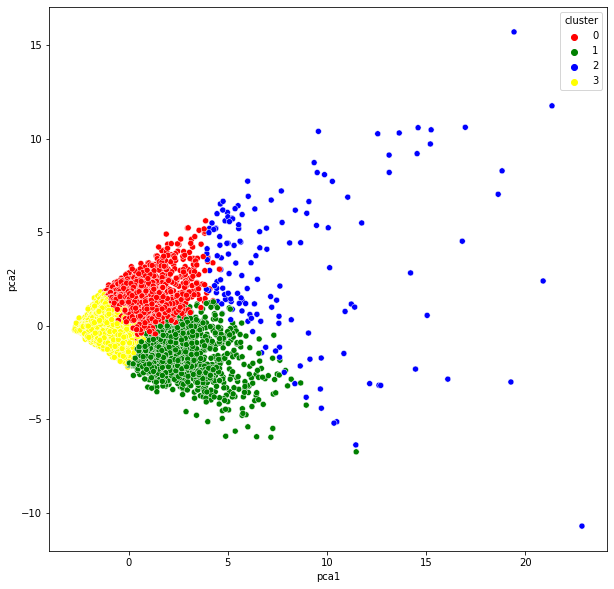

In [113]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red','green','blue','yellow'])